## Importing package

In [803]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import math

import ipywidgets as widgets
from IPython.display import display

## Data Wrangling

### Importing Data

In [804]:
data_frames = {}
data_folder_path = '../data'

for filename in os.listdir(data_folder_path):
    name = os.path.splitext(filename)[0]
    filepath = os.path.join(data_folder_path, filename)
    data_frames[name] = pd.read_csv(filepath)

print(data_frames)

{'product_checkout':              date  checkout_id  is_checkout  qty unit_price
0      2024-12-27      6119008            0    0  Rp 25.000
1      2024-12-27      7003039            0    0  Rp 25.000
2      2024-12-28      2570606            0    0  Rp 25.000
3      2024-12-28      7988659            1    3  Rp 25.000
4      2024-12-28      9540890            1    1  Rp 25.000
...           ...          ...          ...  ...        ...
10462  2025-06-01      9560732            1    2  Rp 25.000
10463  2025-06-01      9615881            0    0  Rp 25.000
10464  2025-06-01      9739102            0    0  Rp 25.000
10465  2025-06-01      9803864            0    0  Rp 25.000
10466  2025-06-01      9823285            0    0  Rp 25.000

[10467 rows x 5 columns], 'campaign_result':              date  campaign_id  user_id  checkout_id  is_click
0      2024-12-31            1        1      5073872       0.0
1      2024-12-31            1        2      5917917       0.0
2      2024-12-31       

In [805]:
data_frames['campaign_budget'].sort_values(by= 'date')

,date,campaign_id,budget
0,2024-12-31,1,15310
1,2024-12-31,2,17402
2,2025-01-01,1,18546
3,2025-01-01,2,14592
4,2025-01-02,1,16993
...,...,...,...
301,2025-05-30,2,17435
302,2025-05-31,1,16275
303,2025-05-31,2,16993
304,2025-06-01,1,14918


In [806]:
data_frames['campaign_result'].sort_values(by= 'date')

,date,campaign_id,user_id,checkout_id,is_click
0,2024-12-31,1,1,5073872,0.0
299,2024-12-31,2,32273,9177988,0.0
298,2024-12-31,2,32272,7019288,0.0
297,2024-12-31,2,32271,5551942,1.0
296,2024-12-31,2,32270,6957605,0.0
...,...,...,...,...,...
65289,2025-06-01,1,32147,4025058,0.0
65288,2025-06-01,1,32146,8713066,0.0
65287,2025-06-01,1,32145,9215035,0.0
65297,2025-06-01,1,32155,5606615,0.0


In [807]:
data_frames['product_checkout'].sort_values(by= 'date')

,date,checkout_id,is_checkout,qty,unit_price
0,2024-12-27,6119008,0,0,Rp 25.000
1,2024-12-27,7003039,0,0,Rp 25.000
2,2024-12-28,2570606,0,0,Rp 25.000
3,2024-12-28,7988659,1,3,Rp 25.000
4,2024-12-28,9540890,1,1,Rp 25.000
...,...,...,...,...,...
10435,2025-06-01,4408633,0,0,Rp 25.000
10436,2025-06-01,4417313,1,3,Rp 25.000
10437,2025-06-01,4449115,0,0,Rp 25.000
10426,2025-06-01,2948609,0,0,Rp 25.000


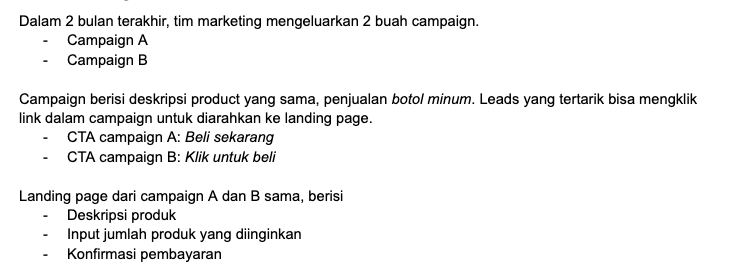

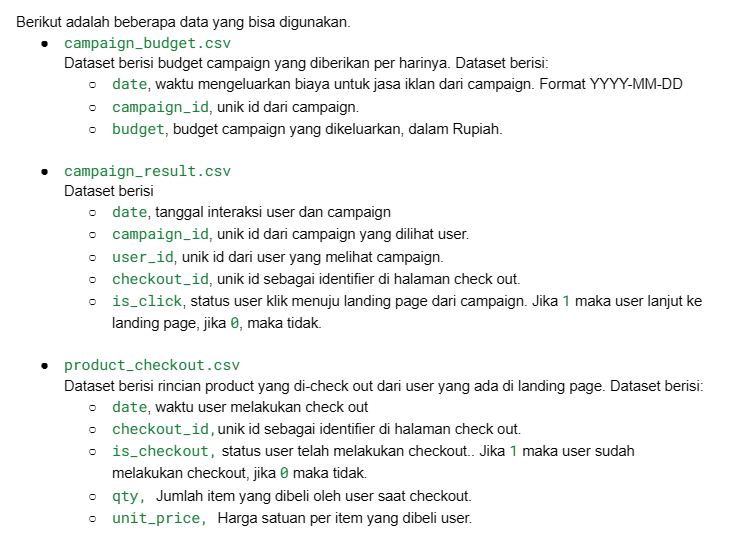

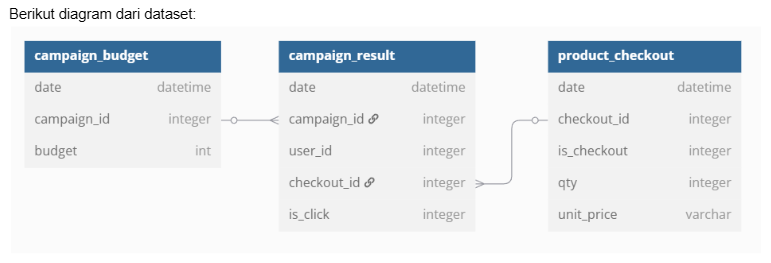

### Cleaning Data

### VALIDATION 

#### campaign_budget

Validasi case campaign_date :

1. Kolom ['date'] :
    - [x]Definisi 2 bulan terakhir 
    - [x]Jumlah campaign per date 
    - [x]Tipe data 
    - [x]Date hilang / NaN
2. Kolom ['campaign_id'] :
    - [x]Unique id (sesuai jumlah campaign berarti ada 2)
    - [x]Tipe data
    - [x]Tipe ID yang hilang / NaN
3. Kolom ['budget'] :
    - [x]Tipe data
    - [x]Apakah ada budget 0 atau minus
    - [x]Cek distribusi budget

In [808]:
campaign_budget = data_frames['campaign_budget']
campaign_budget['date'] = pd.to_datetime(campaign_budget['date'], format= '%Y-%m-%d')
campaign_budget.info()
campaign_budget.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         306 non-null    datetime64[ns]
 1   campaign_id  306 non-null    int64         
 2   budget       306 non-null    int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 7.3 KB


,date,campaign_id,budget
0,2024-12-31,1,15310
1,2024-12-31,2,17402
2,2025-01-01,1,18546
3,2025-01-01,2,14592
4,2025-01-02,1,16993


In [809]:
print("Checking per column : ")
print(f"Unique campaign_id : {campaign_budget['campaign_id'].unique()}")
print(f"Total budget isn't null or less than null : {(campaign_budget['budget'] <= 0).sum()}")
print(f"Total NaN date : {campaign_budget[campaign_budget['date'].isna()]['date'].count()}")
campaign_budget = campaign_budget[(campaign_budget['date'].dt.year >= 2025)]
last_60_days = campaign_budget.sort_values(by= ['date'], ascending= False)['date'].dt.month.unique()[1:3]
print(f"Last 60 days selected months : {last_60_days}")
campaign_budget = campaign_budget[(campaign_budget['date'].dt.month.isin(last_60_days))]
print(f"Date month unique : {campaign_budget['date'].dt.month.unique()}")
print(f"Total campaign_id 1 : {len(campaign_budget[campaign_budget['campaign_id'] == 1])}")
print(f"Total campaign_id 2 : {len(campaign_budget[campaign_budget['campaign_id'] == 2])}")
print(f"Number of NaN campaign ID : {sum(campaign_budget['campaign_id'].isna())}")
campaign_budget_by_date = campaign_budget.groupby(by= 'date')['campaign_id'].count().unique()
print(f"Unique total campaign per day : {campaign_budget_by_date}")

start_marketing_date_a = campaign_budget[campaign_budget['campaign_id'] == 1]['date'].min()
start_marketing_date_b = campaign_budget[campaign_budget['campaign_id'] == 2]['date'].min()
end_marketing_date_a = campaign_budget[campaign_budget['campaign_id'] == 1]['date'].max()
end_marketing_date_b = campaign_budget[campaign_budget['campaign_id'] == 2]['date'].max()
print(f"Start date marketing A : {start_marketing_date_a}")
print(f"Start date marketing B : {start_marketing_date_b}")
print(f"End date marketing A : {end_marketing_date_a}")
print(f"End date marketing B : {end_marketing_date_b}")

print(f"Total budget in last 2 months : {sum(campaign_budget['budget'])}")
print(f"Average budget in lasth 2 months : {round(campaign_budget['budget'].mean(), 2)}")

Checking per column : 
Unique campaign_id : [1 2]
Total budget isn't null or less than null : 0
Total NaN date : 0
Last 60 days selected months : [5 4]
Date month unique : [4 5]
Total campaign_id 1 : 61
Total campaign_id 2 : 61
Number of NaN campaign ID : 0
Unique total campaign per day : [2]
Start date marketing A : 2025-04-01 00:00:00
Start date marketing B : 2025-04-01 00:00:00
End date marketing A : 2025-05-31 00:00:00
End date marketing B : 2025-05-31 00:00:00
Total budget in last 2 months : 2001662
Average budget in lasth 2 months : 16407.07


(array([ 4.,  7., 17., 14., 19., 10., 19., 14., 13.,  5.]),
 array([13889. , 14375.9, 14862.8, 15349.7, 15836.6, 16323.5, 16810.4,
        17297.3, 17784.2, 18271.1, 18758. ]),
 <BarContainer object of 10 artists>)

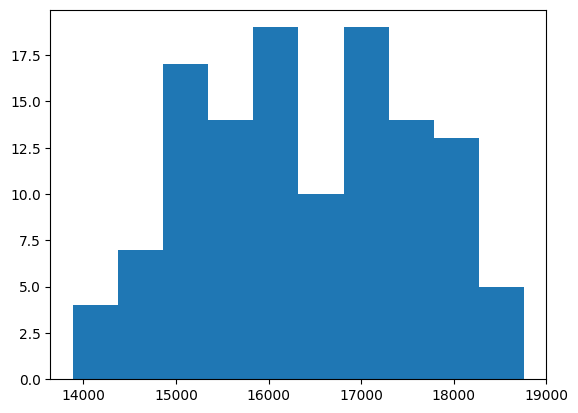

In [810]:
plt.hist(campaign_budget['budget'])

In [811]:
campaign_budget.info()
campaign_budget.head(5)

<class 'pandas.core.frame.DataFrame'>
Index: 122 entries, 182 to 303
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         122 non-null    datetime64[ns]
 1   campaign_id  122 non-null    int64         
 2   budget       122 non-null    int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 3.8 KB


,date,campaign_id,budget
182,2025-04-01,1,16765
183,2025-04-01,2,16977
184,2025-04-02,1,15082
185,2025-04-02,2,16928
186,2025-04-03,1,16748


#### campaign_result

In [812]:
campaign_result = data_frames['campaign_result']
campaign_result['date'] = pd.to_datetime(campaign_result['date'], format= '%Y-%m-%d')
campaign_result.info()
campaign_result

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65570 entries, 0 to 65569
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         65570 non-null  datetime64[ns]
 1   campaign_id  65570 non-null  int64         
 2   user_id      65570 non-null  int64         
 3   checkout_id  65570 non-null  int64         
 4   is_click     63990 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(3)
memory usage: 2.5 MB


,date,campaign_id,user_id,checkout_id,is_click
0,2024-12-31,1,1,5073872,0.0
1,2024-12-31,1,2,5917917,0.0
2,2024-12-31,1,3,7493460,0.0
3,2024-12-31,1,4,9720866,0.0
4,2024-12-31,1,5,2969097,1.0
...,...,...,...,...,...
65565,2025-06-01,2,63196,8862467,0.0
65566,2025-06-01,2,63197,3108344,0.0
65567,2025-06-01,2,63198,5359421,0.0
65568,2025-06-01,2,63199,3146358,1.0


In [813]:
# Checking campaign_result 
print(f"Unique campaign_id : {campaign_result['campaign_id'].unique()}")
print(f"Number of duplicated checkout_id : {(campaign_result['checkout_id'].duplicated()).sum()}")
print(f"Number of duplicated user_id : {(campaign_result['user_id'].duplicated()).sum()}")
print(f"Unique is_click state : {campaign_result['is_click'].unique()}")
print(f"Check if checkout_id is duplicated : {(campaign_result['checkout_id'].duplicated()).sum()}")
print(f"Check if there's NaN date in campaign_result : {sum(campaign_result['date'].isna())}")
print(f"Check if there's missing user_id : {sum(campaign_result['user_id'].isna() + campaign_result['user_id'].isnull())}")

Unique campaign_id : [1 2]
Number of duplicated checkout_id : 0
Number of duplicated user_id : 2370
Unique is_click state : [ 0.  1. nan]
Check if checkout_id is duplicated : 0
Check if there's NaN date in campaign_result : 0
Check if there's missing user_id : 0


#### product_checkout

In [814]:
product_checkout = data_frames['product_checkout']
product_checkout['date'] = pd.to_datetime(product_checkout['date'], format= '%Y-%m-%d')
product_checkout.info()
product_checkout.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10467 entries, 0 to 10466
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         10467 non-null  datetime64[ns]
 1   checkout_id  10467 non-null  int64         
 2   is_checkout  10467 non-null  int64         
 3   qty          10467 non-null  int64         
 4   unit_price   10467 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 409.0+ KB


,date,checkout_id,is_checkout,qty,unit_price
0,2024-12-27,6119008,0,0,Rp 25.000
1,2024-12-27,7003039,0,0,Rp 25.000
2,2024-12-28,2570606,0,0,Rp 25.000
3,2024-12-28,7988659,1,3,Rp 25.000
4,2024-12-28,9540890,1,1,Rp 25.000


In [815]:
print(f"Check if checkout_id is duplicated : {(product_checkout['checkout_id'].duplicated()).sum()}")
print(f"Unique is_click state : {product_checkout['is_checkout'].unique()}")
print(f"Check if qty have 0 or less than 0 : {(product_checkout['qty'] < 0).sum()}")
print(f"Check data type of unit_price : {product_checkout['unit_price'].dtypes} | {product_checkout['unit_price'].unique()}")

Check if checkout_id is duplicated : 0
Unique is_click state : [0 1]
Check if qty have 0 or less than 0 : 41
Check data type of unit_price : object | ['Rp 25.000']


In [816]:
if product_checkout['unit_price'].dtypes == object or product_checkout['unit_price'].dtypes == str:
    product_checkout['unit_price'] = product_checkout['unit_price'].str.replace('Rp', '',).str.replace('.', '').astype(int)

else :
    pass

product_checkout = product_checkout[product_checkout['qty'] >= 0 ]
print(f"Check if qty have 0 or less than 0 : {(product_checkout['qty'] < 0).sum()}")
print(product_checkout['unit_price'].dtypes)
product_checkout['total_sales'] = product_checkout['qty'] * product_checkout['unit_price']
product_checkout

Check if qty have 0 or less than 0 : 0
int64


/tmp/ipykernel_918/1625539046.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_checkout['total_sales'] = product_checkout['qty'] * product_checkout['unit_price']


,date,checkout_id,is_checkout,qty,unit_price,total_sales
0,2024-12-27,6119008,0,0,25000,0
1,2024-12-27,7003039,0,0,25000,0
2,2024-12-28,2570606,0,0,25000,0
3,2024-12-28,7988659,1,3,25000,75000
4,2024-12-28,9540890,1,1,25000,25000
...,...,...,...,...,...,...
10462,2025-06-01,9560732,1,2,25000,50000
10463,2025-06-01,9615881,0,0,25000,0
10464,2025-06-01,9739102,0,0,25000,0
10465,2025-06-01,9803864,0,0,25000,0


#### Merging data frames

In [817]:
main_df = campaign_result.copy()
print(sum(main_df['is_click'].isna()))
# main_df = main_df.join(product_checkout.set_index('checkout_id'), how='right', on= 'checkout_id', lsuffix= '_result', rsuffix= '_checkout')
main_df = main_df.merge(product_checkout, on='checkout_id', how= 'left', suffixes=('_result', '_checkout'))
# main_df = main_df.rename(columns= {'date_result' : 'date'})
main_df['start_marketing'] = main_df['campaign_id'].map({
    1 : start_marketing_date_a,
    2 : start_marketing_date_b
})

main_df = main_df[(main_df['date_result'] >= main_df['start_marketing'])]
# print(sum(main_df['is_click'].isna()))
main_df['is_click'].unique()
main_df


1580


,date_result,campaign_id,user_id,checkout_id,is_click,date_checkout,is_checkout,qty,unit_price,total_sales,start_marketing
39103,2025-04-01,1,19125,3125247,0.0,NaT,NaN,NaN,NaN,NaN,2025-04-01
39104,2025-04-01,1,19126,3595112,0.0,NaT,NaN,NaN,NaN,NaN,2025-04-01
39105,2025-04-01,1,19127,6129707,NaN,NaT,NaN,NaN,NaN,NaN,2025-04-01
39106,2025-04-01,1,19128,2204955,1.0,2025-04-01,0.0,0.0,25000.0,0.0,2025-04-01
39107,2025-04-01,1,19129,6703486,0.0,NaT,NaN,NaN,NaN,NaN,2025-04-01
...,...,...,...,...,...,...,...,...,...,...,...
65565,2025-06-01,2,63196,8862467,0.0,NaT,NaN,NaN,NaN,NaN,2025-04-01
65566,2025-06-01,2,63197,3108344,0.0,NaT,NaN,NaN,NaN,NaN,2025-04-01
65567,2025-06-01,2,63198,5359421,0.0,NaT,NaN,NaN,NaN,NaN,2025-04-01
65568,2025-06-01,2,63199,3146358,1.0,2025-06-01,1.0,1.0,25000.0,25000.0,2025-04-01


In [818]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26467 entries, 39103 to 65569
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date_result      26467 non-null  datetime64[ns]
 1   campaign_id      26467 non-null  int64         
 2   user_id          26467 non-null  int64         
 3   checkout_id      26467 non-null  int64         
 4   is_click         25855 non-null  float64       
 5   date_checkout    3387 non-null   datetime64[ns]
 6   is_checkout      3387 non-null   float64       
 7   qty              3387 non-null   float64       
 8   unit_price       3387 non-null   float64       
 9   total_sales      3387 non-null   float64       
 10  start_marketing  26467 non-null  datetime64[ns]
dtypes: datetime64[ns](3), float64(5), int64(3)
memory usage: 2.4 MB


### EDA

In [819]:
def calculate_engagement_rate(data_frame):

    ''' 
    This function is used for calculate Engagement Rate

    num_engangement : total of leads did click (because only click is available)
    num_impressions : total of users interact with campaign
    
    '''

    engagement_rate = []
    
    for campaign_id in data_frame['campaign_id'].unique():
        num_engagements =  len(data_frame[(data_frame['campaign_id'] == campaign_id) & (data_frame['is_click'] == 1)]['user_id'].unique())
        num_impressions = len(data_frame[data_frame['campaign_id'] == campaign_id]['user_id'].unique())

        engagement_rate.append(num_engagements / num_impressions)

    return engagement_rate

def calculate_ctr(data_frame):

    ''' 
    This function is used to calculate Click Through Rate (CTR)

    total_conversions : total of leads clicked to go landing page (possible double click or more)
    total_interactions : total of users interact with campaign

    '''
    ctr_val = []

    for campaign_id in data_frame['campaign_id'].unique():
        total_conversions = len(data_frame[data_frame['campaign_id' == campaign_id]]['user_id'])
        total_interactions = len(data_frame[(data_frame['campaign_id'] == campaign_id) & (data_frame['is_click'] == 1)])
        ctr_val.append(total_conversions / total_interactions)

    return ctr_val

def calculate_conversion_rate(data_frame):

    ''' 
    This function is used to calculate Conversion Rate 

    total_buyer : total of leads that checkout / buy something
    total_interactions : total of users that interact with campaign

    '''
    
    data_frame = data_frame[data_frame['date_checkout'] >= data_frame['date_result']]

    conversion_rate = []

    for campaign_id in  data_frame['campaign_id'].unique():
        total_buyer = len(data_frame[(data_frame['campaign_id'] == campaign_id) & (data_frame['is_checkout'] == 1)]['checkout_id'])
        total_interactions = len(data_frame[(data_frame['campaign_id'] == campaign_id) & (data_frame['is_click'] == 1)])
        conversion_rate.append(total_buyer / total_interactions)

    return conversion_rate

def calculate_revenue(data_frame, campaign_df):

    total_sales = sum(data_frame['total_sales'])
    total_marketing_spend = sum(campaign_df['budget'])
    
    revenue = total_sales - total_marketing_spend

    return revenue

def calculate_cpl(data_frame, total_budget):

    ''' 
    This function is used to calculate Cost Per Lead (CPL)

    total_budget : total spend of marketing campaign
    num_leads : total of users that clicked to go landing page

    '''
    cpl_val = []
    counter = 0
    
    for campaign_id in data_frame['campaign_id'].unique():
        num_leads = len(data_frame[data_frame['campaign_id'] == campaign_id]['user_id'].unique())
        cpl_val.append(total_budget[counter] / num_leads)
        counter += 1

    counter = 0 # reset counter
    return cpl_val

def calculate_cac(data_frame, total_budget):

    ''' 
    This function is used to calculate Customer Acquisition Cost (CAC)

    total_budget : total spend of marketing campaign
    new_customers : customer that buy something after campaign happened

    '''
    cac_val = []
    counter = 0

    for campaign_id in data_frame['campaign_id'].unique():
        new_customers = len(data_frame[(data_frame['campaign_id'] == campaign_id) & (data_frame['is_checkout'] == 1)]['user_id'].unique())
        cac_val.append(total_budget[counter] / new_customers)
        counter += 1

    counter = 0 # reset counter
    return cac_val


campaigns = ['A', 'B', 'C', 'D', 'E', 'F']
campaign_counter = 0

#### Engagement Exploration

In [820]:
engagement_rate_a, engagement_rate_b = calculate_engagement_rate(main_df)

print(f"Engagement rate A : {round(engagement_rate_a * 100, 2)}%")
print(f"Engagement rate B : {round(engagement_rate_b * 100, 2)}%")

Engagement rate A : 13.7%
Engagement rate B : 13.94%


##### Davis Engagement 

<Axes: xlabel='date_result'>

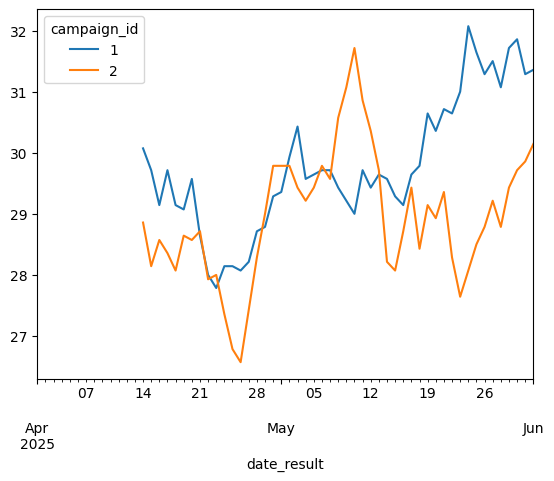

In [821]:
daily_counts_engagement = main_df.copy()
daily_counts_engagement['month'] = daily_counts_engagement['date_result'].dt.month

daily_counts_engagement = main_df.groupby(['date_result', 'campaign_id'])['is_click'].sum().reset_index()

daily_counts_engagement = pd.pivot(daily_counts_engagement, index= 'date_result', columns= 'campaign_id', values= 'is_click')
daily_counts_engagement.rolling(window= 14).mean().plot.line()

#### Conversion Rate Exploration

In [822]:
conversion_rate_a, conversion_rate_b = calculate_conversion_rate(main_df)

print(f"Conversion rate A : {round(conversion_rate_a * 100, 2)}%")
print(f"Conversion rate B : {round(conversion_rate_b * 100, 2)}%")

Conversion rate A : 15.49%
Conversion rate B : 19.31%


##### Davis Conversion Rate

<Axes: xlabel='date_result'>

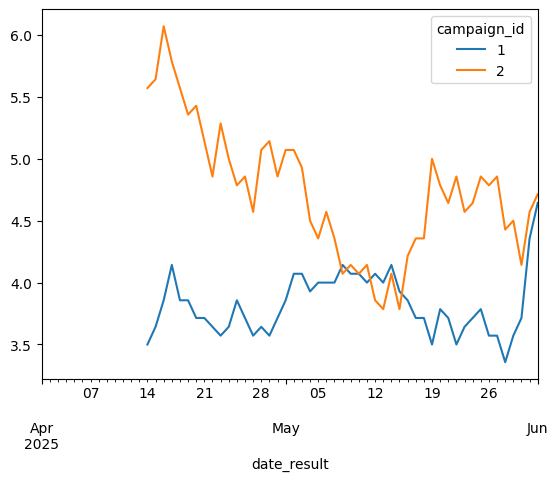

In [823]:
daily_counts_cvr = main_df.copy()

daily_counts_cvr = daily_counts_cvr[daily_counts_cvr['date_checkout'] >= daily_counts_cvr['date_result']]
daily_counts_cvr = daily_counts_cvr.groupby(['date_result', 'campaign_id'])['is_checkout'].sum().reset_index()

daily_counts_cvr = pd.pivot(daily_counts_cvr, index= 'date_result', columns= 'campaign_id', values= 'is_checkout')
daily_counts_cvr.rolling(window= 14).mean().plot.line()

#### Estimasi Biaya Marketing

In [824]:
print(f"Total budget campaigin A : {sum(campaign_budget[campaign_budget['campaign_id'] == 1]['budget'])}")
print(f"Total budget campaigin B : {sum(campaign_budget[campaign_budget['campaign_id'] == 2]['budget'])}")

Total budget campaigin A : 1009572
Total budget campaigin B : 992090


<Axes: xlabel='date'>

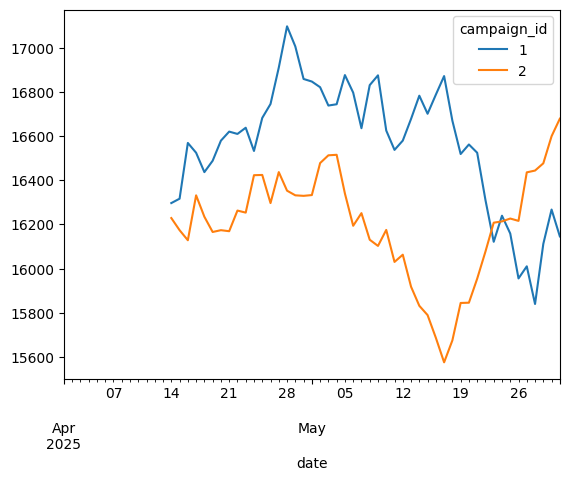

In [825]:
daily_counts_campaign = campaign_budget.copy()
daily_counts_campaign = daily_counts_campaign.groupby(['date', 'campaign_id'])['budget'].sum().reset_index()

daily_counts_campaign = pd.pivot(daily_counts_campaign, index= 'date', columns= 'campaign_id', values= 'budget')
daily_counts_campaign.rolling(window= 14).mean().plot.line()

In [828]:
total_budget_campaign_A , total_budget_campaign_B = sum(campaign_budget[campaign_budget['campaign_id'] == 1]['budget']), sum(campaign_budget[campaign_budget['campaign_id'] == 2]['budget']) 
total_budget = [total_budget_campaign_A, total_budget_campaign_B]

cpl_a, cpl_b = calculate_cpl(main_df, total_budget)
print(f"CPL campaign A : {round(cpl_a, 2)}")
print(f"CPL campaign B : {round(cpl_b, 2)}")

cac_a, cac_b = calculate_cac(main_df, total_budget)
print(f"CAC campaign A : {round(cac_a, 2)}")
print(f"CAC campaign B : {round(cac_b, 2)}")

CPL campaign A : 74.44
CPL campaign B : 76.88
CAC campaign A : 3809.71
CAC campaign B : 3071.49


### Dummy

In [827]:
# campaign_budget_a = data_frames['campaign_budget'][data_frames['campaign_budget']['campaign_id'] == 1]
# campaign_budget_b = data_frames['campaign_budget'][data_frames['campaign_budget']['campaign_id'] == 2]

# campaign_result_a = data_frames['campaign_result'][data_frames['campaign_result']['campaign_id'] == 1]
# campaign_result_b = data_frames['campaign_result'][data_frames['campaign_result']['campaign_id'] == 2]

# product_checkout = data_frames['product_checkout']
# product_checkout_a = data_frames['product_checkout'][data_frames['product_checkout']['checkout_id'].isin(campaign_result_a['checkout_id'])]
# product_checkout_b = data_frames['product_checkout'][data_frames['product_checkout']['checkout_id'].isin(campaign_result_b['checkout_id'])]

# campaign_budget_a.loc[:,'date'] = pd.to_datetime(campaign_budget_a['date'])
# campaign_budget_b.loc[:,'date'] = pd.to_datetime(campaign_budget_b['date'])

# campaign_result_a.loc[:,'date'] = pd.to_datetime(campaign_result_a['date'])
# campaign_result_b.loc[:,'date'] = pd.to_datetime(campaign_result_b['date'])

# product_checkout.loc[:,'date'] = pd.to_datetime(product_checkout['date'])

# start_marketing_date_a = campaign_budget_a['date'].min()
# start_marketing_date_b = campaign_budget_b['date'].min()

# total_income_a = product_checkout[product_checkout['date'] >= start_marketing_date_a].copy()
# total_income_a['profit'] = total_income_a['qty'] * total_income_a['unit_price']
# total_income_a = sum(total_income_a['profit'])

# total_income_b = product_checkout[product_checkout['date'] >= start_marketing_date_b].copy()
# total_income_b['profit'] = total_income_b['qty'] * total_income_b['unit_price']
# total_income_b = sum(total_income_b['profit'])


# df_result_product_a = campaign_result_a.join(product_checkout_a.set_index('checkout_id'), on= 'checkout_id', lsuffix= '_result', rsuffix= '_product')
# df_result_product_b = campaign_result_b.join(product_checkout_b.set_index('checkout_id'), on= 'checkout_id', lsuffix= '_result', rsuffix= '_product')

# # Efektifitas Campaign
# engagement_rate_a = calculate_engagement_rate(
#     len(campaign_result_a[campaign_result_a['is_click'] == 1]['user_id'].unique()),
#     len(campaign_result_a)
# )

# engagement_rate_b = calculate_engagement_rate(
#     len(campaign_result_b[campaign_result_b['is_click'] == 1]['user_id'].unique()),
#     len(campaign_result_b)
# )

# ctr_campaign_a = calculate_ctr(
#     len(campaign_result_a[(campaign_result_a['is_click'] == 1)]),
#     len(campaign_result_a)
# )

# ctr_campaign_b = calculate_ctr(
#     len(campaign_result_b[campaign_result_b['is_click'] == 1]),
#     len(campaign_result_b)
# )

# conversion_rate_campaign_a = calculate_conversion_rate(
#     len(
#         product_checkout[
#             (product_checkout['date'] >= start_marketing_date_a) &
#             (product_checkout['checkout_id'].isin(campaign_result_a['checkout_id'])) &
#             (product_checkout['is_checkout'] == 1)
#         ]
#     ),
#     len(
#         campaign_result_a['user_id'].unique()
#     )
# )

# conversion_rate_campaign_b = calculate_conversion_rate(
#     len(
#         product_checkout[
#             (product_checkout['date'] >= start_marketing_date_b) &
#             (product_checkout['checkout_id'].isin(campaign_result_b['checkout_id'])) &
#             (product_checkout['is_checkout'] == 1)
#         ]
#     ),
#     len(
#         campaign_result_b['user_id'].unique()
#     )
# )

# revenue_campaign_a = calculate_revenue(
#     sum(campaign_budget_a['budget']),
#     total_income_a
# )

# revenue_campaign_b = calculate_revenue(
#     sum(campaign_budget_b['budget']),
#     total_income_b
# )

# # Biaya campaign
# cpl_campaign_a = calculate_cpl(
#     sum(campaign_budget_a['budget']),
#     len(campaign_result_a[campaign_result_a['is_click'] == 1])
# )

# cpl_campaign_b = calculate_cpl(
#     sum(campaign_budget_b['budget']),
#     len(campaign_result_b[campaign_result_b['is_click'] == 1])
# )

# # ========= old CAC
# # cac_campaign_a = calculate_cac(
# #     sum(campaign_budget_a['budget']),
# #     len(
# #         product_checkout[
# #             (product_checkout['date'] >= start_marketing_date_a) &
# #             (product_checkout['checkout_id'].isin(campaign_result_a['checkout_id'])) &
# #             (product_checkout['is_checkout'] == 1)
# #         ]
# #     )
# # )


# # cac_campaign_b = calculate_cac(
# #     sum(campaign_budget_b['budget']),
# #     len(
# #         product_checkout[
# #             (product_checkout['date'] >= start_marketing_date_b) &
# #             (product_checkout['checkout_id'].isin(campaign_result_b['checkout_id'])) &
# #             (product_checkout['is_checkout'] == 1)
# #         ]
# #     )
# # )

# cac_campaign_a = calculate_cac(
#     sum(campaign_budget_a['budget']),
#     len(
#         df_result_product_a[
#             (df_result_product_a['date_product'] >= start_marketing_date_a) &
#             (df_result_product_a['is_checkout'] == 1) &
#             (df_result_product_a['campaign_id'].isin([1,2]))
#         ]
#     )
# )

# cac_campaign_b = calculate_cac(
#     sum(campaign_budget_b['budget']),
#     len(
#         df_result_product_b[
#             (df_result_product_b['date_product'] >= start_marketing_date_b) &
#             (df_result_product_b['is_checkout'] == 1) &
#             (df_result_product_b['campaign_id'].isin([1,2]))
#         ]
#     )
# )

# print("Eksplorasi efektifitas campaign: ")
# print(f"Engagement rate campagin A : {round(engagement_rate_a, 4)}%")
# print(f"Engagement rate campagin B : {round(engagement_rate_b, 4)}%", '\n')
# print(f"CTR campagin A : {round(ctr_campaign_a, 4)}%")
# print(f"CTR campagin B : {round(ctr_campaign_b, 4)}%", '\n')
# print(f"Conversion rate campaign A : {round(conversion_rate_campaign_a, 4)}%")
# print(f"Conversion rate campaign B : {round(conversion_rate_campaign_b, 4)}%", '\n')
# print(f"Revenue campaign A : Rp.{revenue_campaign_a}")
# print(f"Revenue campaign B : Rp.{revenue_campaign_b}", '\n')

# print("Eksplorasi biaya campaign: ")
# print(f"CPL campaign A : Rp.{round(cpl_campaign_a, 4)}")
# print(f"CPL campaign B : Rp.{round(cpl_campaign_b, 4)}", '\n')
# print(f"CAC campaign A : Rp.{round(cac_campaign_a, 4)}")
# print(f"CAC campaign B : Rp.{round(cac_campaign_b, 4)}")